# 1. 요약 : 절차

## 1.1. 시계열 데이터 준비
  - Yahoo finance에서 주식 검색
    - facebook, google
    - hyundai, kia, ford, toyota, volkswagen
    - download -> filename 변경
  - 전처리
    - 결측치 처리
    - 로그변환
    
## 1.2. 시계열 안정성 분석
  - 정성적 그래프 분석
  - ADF(Augmented Dicky Fuller)
    - 정상성을 알아보기 위한 검정 방법
    
  - 시계열 분해(Time seires Decomposition)
    - 시계열 자료를 추세(trend), 계절성(seasonality), 잔차(residual)로 분해
    - 시계열 분해 후 추세와 계절성을 제외한 잔차가 특정 패턴 없이 무작위 분포를 띠고 작은 값이면 추세와 계절성으로 모형화가 잘 되는 것
    - 시계열 분해 후 잔차에 특정 패턴이 존재 -> 잔차에 대해서만 다른 모형을 추가로 적합할 수 있음
    
## 1.3. train data, test data 생성
  - train data : 0.9
  - test data : 0.1
  
## 1.4. ARIMA
  - ACF, PACF 그려보기
  - 차분 안정성 확인

## 1.5. 모델 훈련과 테스트
  - ARIMA 모델 빌드와 훈련
  - 모델 테스트
  - 최종 예측 모델 정확도 측정(MAPE)


# 2. 결과
  - 1. facebook
    - MSE:  168.61429069790978
    - MAE:  11.280789900670175
    - RMSE:  12.985156552691606
    - MAPE: 4.27%

  - 2. google
    - MSE:  16400.033624035972
    - MAE:  111.59633474792555
    - RMSE:  128.0626160283944
    - MAPE: 5.39%

  - 3. hyundai motor
    - MSE:  49.22400881951998
    - MAE:  5.802756512072941
    - RMSE:  7.015982384493277
    - MAPE: 11.43%

  - 4. kia motor
    - MSE:  190870204.8490533
    - MAE:  11517.820031207057
    - RMSE:  13815.578339289792
    - MAPE: 14.05%

  - 5. ford motor
    - MSE:  0.3258751269122366
    - MAE:  0.49693725086735885
    - RMSE:  0.5708547336339049
    - MAPE: 4.43%

  - 6. toyota motor
    - MSE:  33.087448722069524
    - MAE:  4.663047667285624
    - RMSE:  5.752169044983773
    - MAPE: 3.14%

  - 7. volkswagen motor
    - MSE:  0.7727866455736261
    - MAE:  0.6658380995517944
    - RMSE:  0.87908284340762
    - MAPE: 2.92%
 

  - volkswagen motor 결과 이미지 01
  
  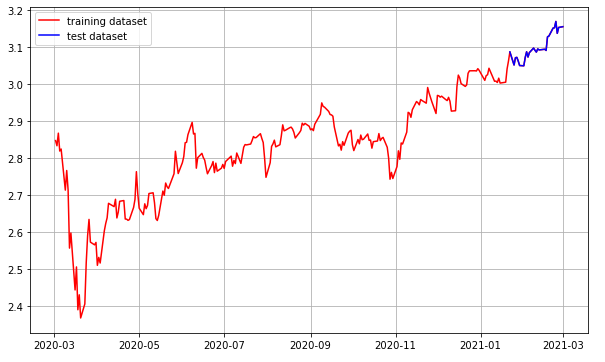
 

  - volkswagen motor 결과 이미지 02
  
  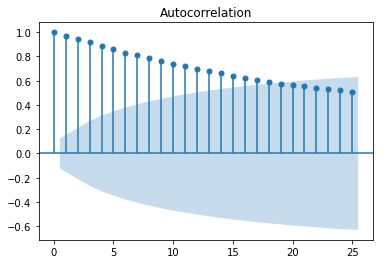


  - volkswagen motor 결과 이미지 03
  
  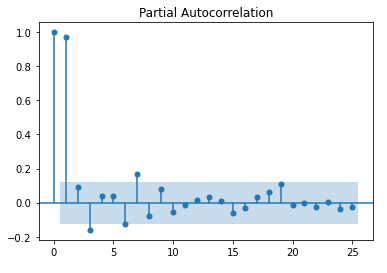


  - volkswagen motor 결과 이미지 04
  
  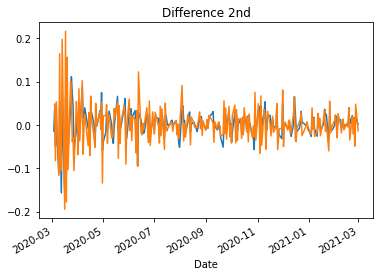

  - volkswagen motor 결과 이미지 05
  
  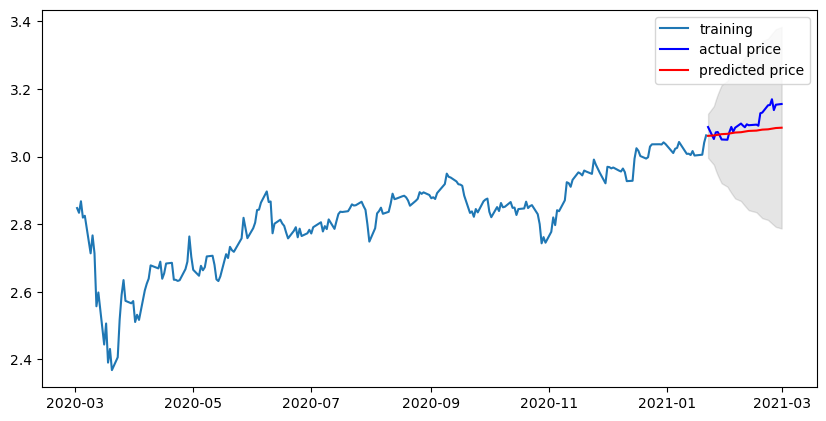


# 3. 회고

  - 어려웠던 점
    - 눈의 피로도가 심해 자세히 살펴보지 못하고 진행
    - ARIMA의 개념을 정확히 파악하지 못하고 접근하면서 어려움을 겪음
      
  - 느낀 점
    - 코드를 익히는 방법을 찾기로 하고 모든 코드를 입력함
      - lms에 올라온 코드를 복사-붙여넣기로 일관했는데 학습이 제대로 되지 않는다는 것을 느낌
      - lms에 올라온 코드지만 실제 타이핑을 해 보니 복사-붙여넣기 하는 것보다 많이 익히게 됨
    - 데이터 선정 : IT 두 개 선택, 자동차 5개 선택
      - MAPE값이 현대와 기아자동차만 유독 10% 이상이 됨
      - 예측이 어렵다는 것을 의미하는 것 같음
      - 그 이유에 대한 분석이 이루어져야 예측 시스템이 좀더 정확하게 작동할 것 같음


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
def read_data(filename):
    dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/'+filename
    df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
    ts = df['Close']
    
    ts = ts.interpolate(method='time')
    ts[ts.isna()]
    
    ts_log = np.log(ts)
    print(ts.head())
    
    return ts_log
    

In [20]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


In [21]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [22]:
def anal_stat(filename, ts_log):
    #정성적 그래프 분석
    plot_rolling_statistics(ts_log, window=12)

    #정량적 Augmented Dicky-Fuller Test
    augmented_dickey_fuller_test(ts_log)
    
    #시계열 분해 (Time Series Decomposition)
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(ts_log, label=filename+'Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label=filename+'Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label=filename+'Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label=filename+'Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    residual.dropna(inplace=True)
    augmented_dickey_fuller_test(residual)
    

In [23]:
def split_data(ts_log):
    sd = int(len(ts_log)*0.9)
    train_data, test_data = ts_log[:sd], ts_log[sd:]
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    
    #train_data를 적용하면 그래프가 끊어져 보이므로 
    #  자연스러운 연출을 위해 ts_log를 선택
    plt.plot(ts_log, c='r', label='training dataset')
    plt.plot(test_data, c='b', label='test dataset')
    plt.legend()
    
    return train_data, test_data

In [36]:
def draw_acf_pacf(ts_log):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    plot_acf(ts_log)    # ACF : Autocorrelation 그래프 그리기
    plot_pacf(ts_log)    # PACF : Partial Autocorrelation 그래프 그리기
    plt.show()

In [37]:
def differencing(ts_log):
    #차분 안정성 확인 -> d 구하기
    # 1차 차분 구하기
    
    diff_first = ts_log.diff(periods=1).iloc[1:]
    diff_first.plot(title='Difference 1st')
    
    augmented_dickey_fuller_test(diff_first)
    
    #혹시 필요한 경우 2차 차분 구하기
    diff_second = diff_first.diff(periods=1).iloc[1:]
    diff_second.plot(title='Difference 2nd')
    
    augmented_dickey_fuller_test(diff_second)

In [50]:
def model_train_test(train_data, test_data):
    from statsmodels.tsa.arima_model import ARIMA
    
    # Build and Train Model
    model = ARIMA(train_data, order=(1, 1, 0))
    fitted_m = model.fit(disp=-1)
    print(fitted_m.summary())
    
    # Forecast : 결과가 fc에 담깁니다.
    fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test_data.index)  # 에측결과
    #예측결과의 하한
    lower_series = pd.Series(conf[:, 0], index=test_data.index)
    #예측결과의 상한
    upper_series = pd.Series(conf[:, 1], index=test_data.index)
    
    #plot
    plt.figure(figsize=(10, 5), dpi=100)
    plt.plot(train_data, label='training')
    plt.plot(test_data, c='b', label='actual price')
    plt.plot(fc_series, c='r', label='predicted price')
    plt.fill_between(lower_series.index, lower_series, upper_series,
                    color='k', alpha=.10)
    plt.legend()
    plt.show()
    
    return fc, se, conf

In [54]:
def result(test_data):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math
    
    mse = mean_squared_error(np.exp(test_data), np.exp(fc))
    print('MSE: ', mse)
    
    mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
    print('MAE: ', mae)
    
    rmse = math.sqrt(mean_squared_error(np.exp(test_data),
                                        np.exp(fc)))
    print('RMSE: ', rmse)
    
    mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.exp(test_data))
    print('MAPE: {:.2f}%'.format(mape*100))

In [73]:
files_name = [
    'facebook.csv', 'google.csv', 'hyundai_motor.csv', 'kia_motor.csv',
    'ford_motor.csv', 'toyota_motor.csv', 'volkswagen_motor.csv'
]
files_name[6]

'volkswagen_motor.csv'

Date
2020-03-02    196.440002
2020-03-03    185.889999
2020-03-04    191.759995
2020-03-05    185.169998
2020-03-06    181.089996
Name: Close, dtype: float64


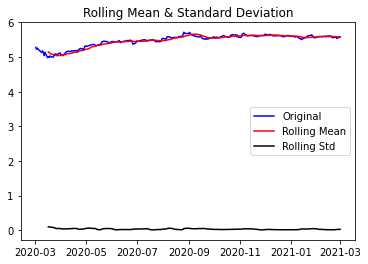

Results of Dickey-Fuller Test:
Test Statistic                  -1.638060
p-value                          0.463275
#Lags Used                       6.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.811672e+00
p-value                        4.386727e-07
#Lags Used                     5.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


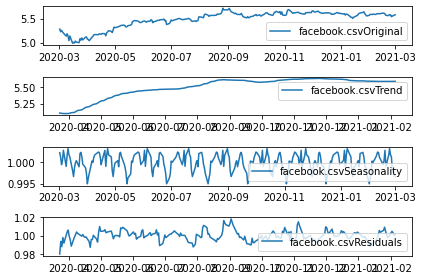

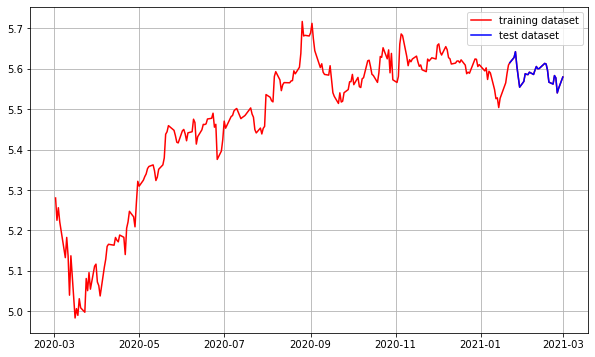

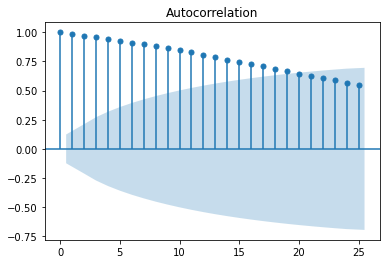

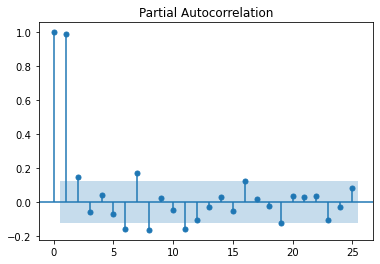

Results of Dickey-Fuller Test:
Test Statistic                -7.198041e+00
p-value                        2.405767e-10
#Lags Used                     5.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.402589e+00
p-value                        7.487298e-11
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 474.060
Method:                       css-mle   S.D. of innovat

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

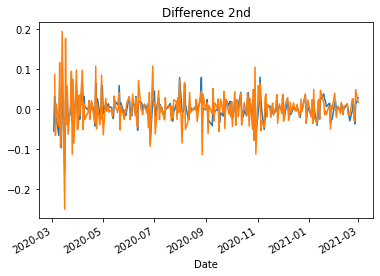

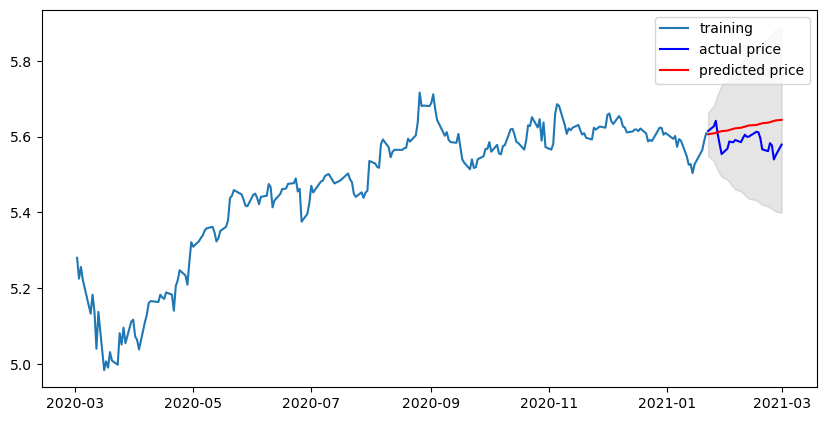

MSE:  168.61429069790978
MAE:  11.280789900670175
RMSE:  12.985156552691606
MAPE: 4.27%


In [64]:
filename = files_name[0]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)

Date
2020-03-02    1389.109985
2020-03-03    1341.390015
2020-03-04    1386.520020
2020-03-05    1319.040039
2020-03-06    1298.410034
Name: Close, dtype: float64


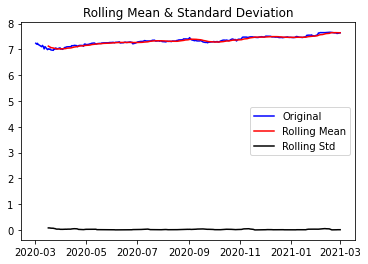

Results of Dickey-Fuller Test:
Test Statistic                  -1.253340
p-value                          0.650240
#Lags Used                      13.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.226596e+00
p-value                        2.045417e-10
#Lags Used                     0.000000e+00
Number of Observations Used    2.210000e+02
Critical Value (1%)           -3.460291e+00
Critical Value (5%)           -2.874709e+00
Critical Value (10%)          -2.573789e+00
dtype: float64


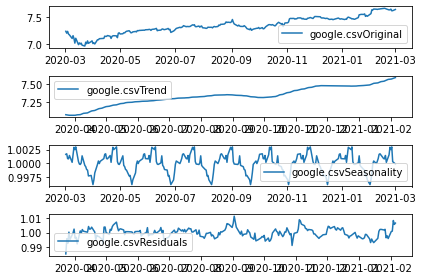

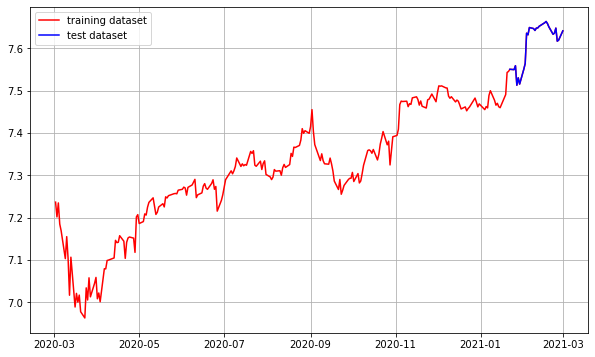

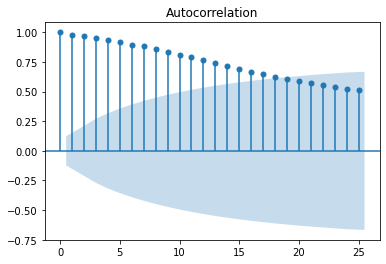

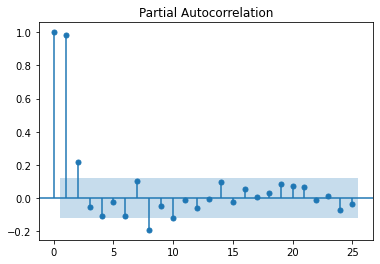

Results of Dickey-Fuller Test:
Test Statistic                  -5.035423
p-value                          0.000019
#Lags Used                      12.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.623032e+00
p-value                        5.970671e-09
#Lags Used                     1.100000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 522.498
Method:                       css-mle   S.D. of innovations          

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

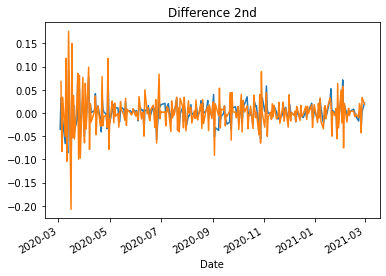

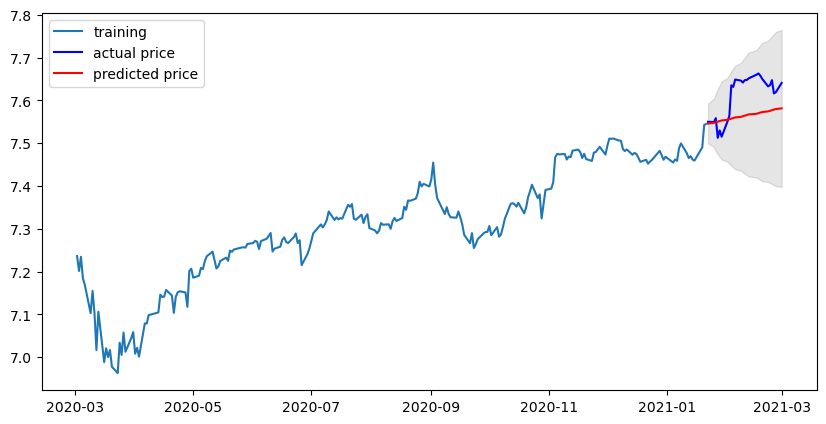

MSE:  16400.033624035972
MAE:  111.59633474792555
RMSE:  128.0626160283944
MAPE: 5.39%


In [65]:
filename = files_name[1]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)

Date
2020-03-02    33.0
2020-03-03    27.5
2020-03-04    27.5
2020-03-05    27.5
2020-03-06    27.5
Name: Close, dtype: float64


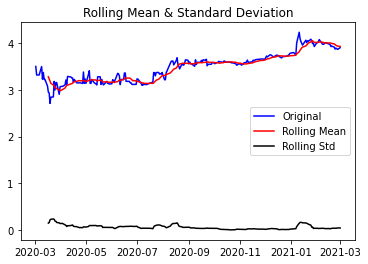

Results of Dickey-Fuller Test:
Test Statistic                  -0.796866
p-value                          0.820041
#Lags Used                       4.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.728649
p-value                          0.000074
#Lags Used                      10.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64


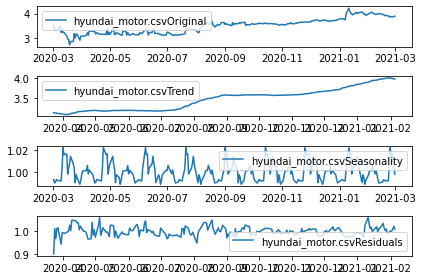

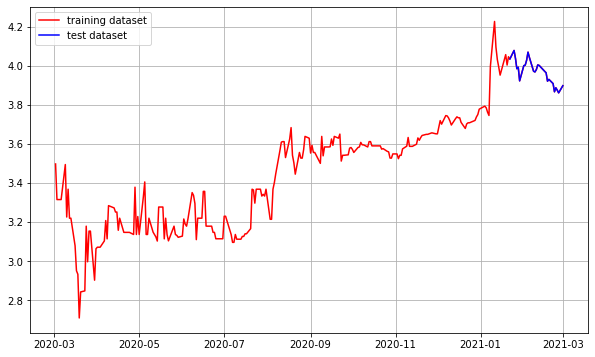

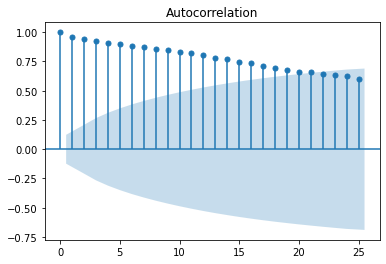

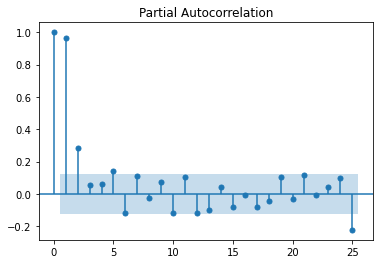

Results of Dickey-Fuller Test:
Test Statistic                -8.126535e+00
p-value                        1.119262e-12
#Lags Used                     5.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.198312e+00
p-value                        7.346377e-13
#Lags Used                     1.400000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 251.554
Method:                       css-mle   S.D. of innovat

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

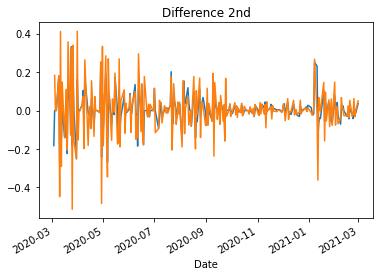

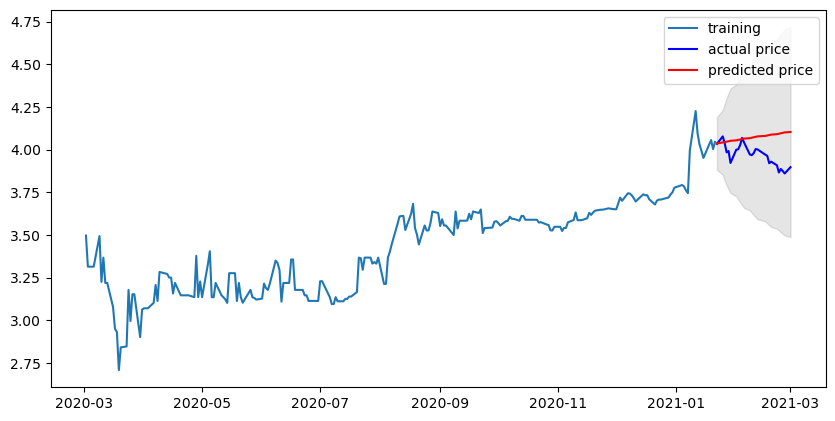

MSE:  49.22400881951998
MAE:  5.802756512072941
RMSE:  7.015982384493277
MAPE: 11.43%


In [66]:
filename = files_name[2]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)

Date
2020-03-02    34500.0
2020-03-03    34900.0
2020-03-04    35750.0
2020-03-05    35900.0
2020-03-06    34650.0
Name: Close, dtype: float64


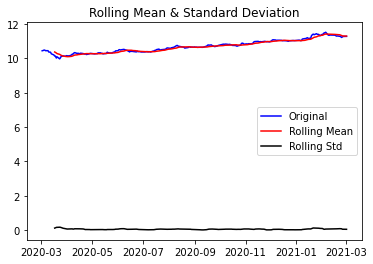

Results of Dickey-Fuller Test:
Test Statistic                  -0.089525
p-value                          0.950472
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.788226
p-value                          0.000057
#Lags Used                       2.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


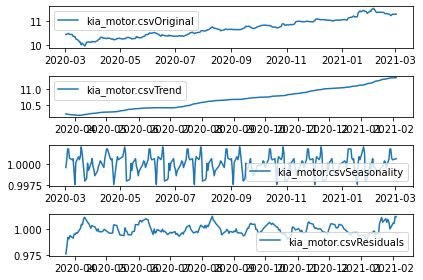

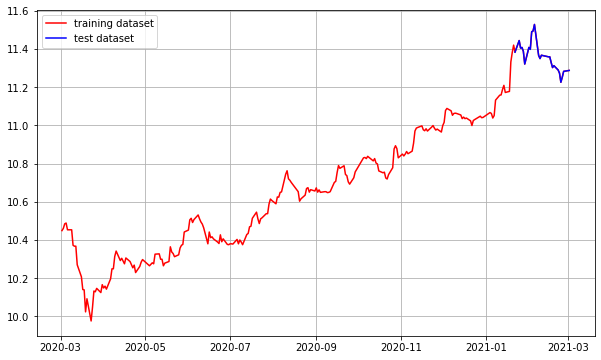

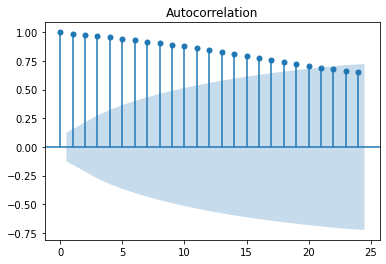

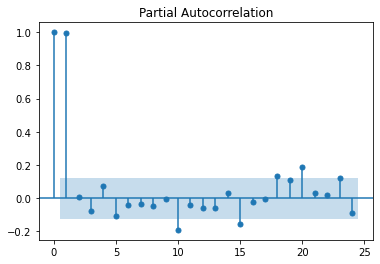

Results of Dickey-Fuller Test:
Test Statistic                -8.562864e+00
p-value                        8.601066e-14
#Lags Used                     2.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.943000e+00
p-value                        1.013770e-09
#Lags Used                     1.400000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 433.154
Method:                       css-mle   S.D. of innovat

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

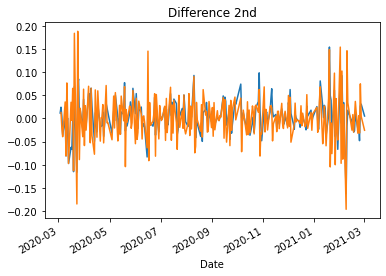

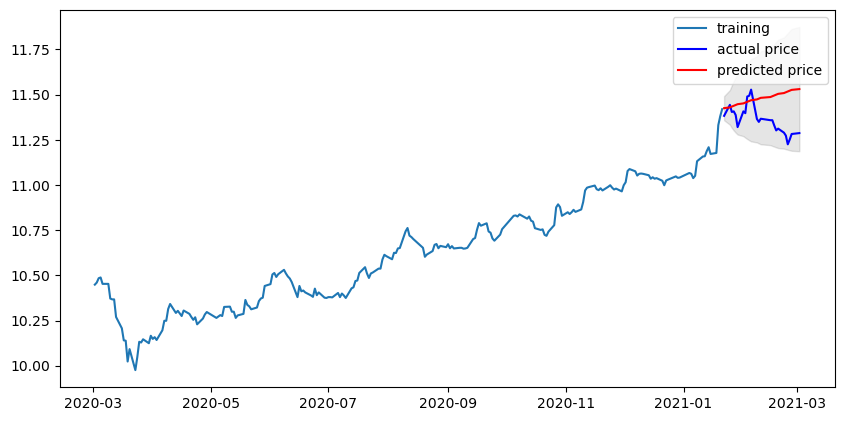

MSE:  190870204.8490533
MAE:  11517.820031207057
RMSE:  13815.578339289792
MAPE: 14.05%


In [67]:
filename = files_name[3]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)

Date
2020-03-02    7.20
2020-03-03    6.97
2020-03-04    7.08
2020-03-05    6.74
2020-03-06    6.49
Name: Close, dtype: float64


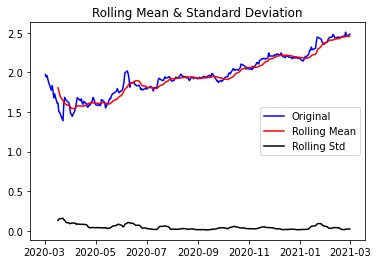

Results of Dickey-Fuller Test:
Test Statistic                   0.311734
p-value                          0.977876
#Lags Used                       6.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.666636e+00
p-value                        4.699658e-09
#Lags Used                     1.000000e+00
Number of Observations Used    2.200000e+02
Critical Value (1%)           -3.460428e+00
Critical Value (5%)           -2.874769e+00
Critical Value (10%)          -2.573821e+00
dtype: float64


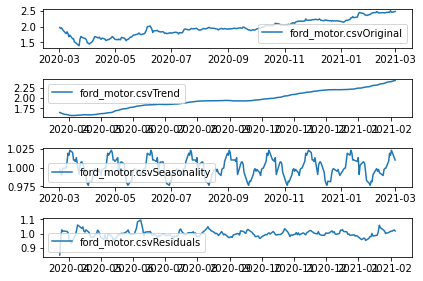

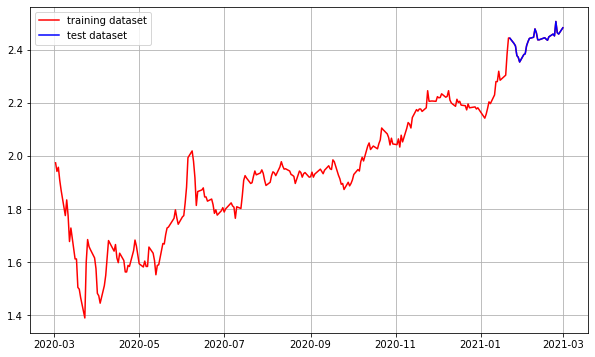

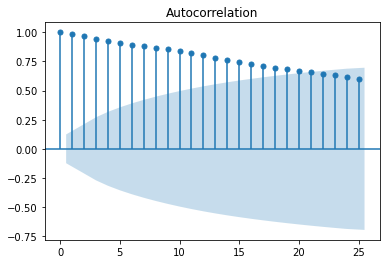

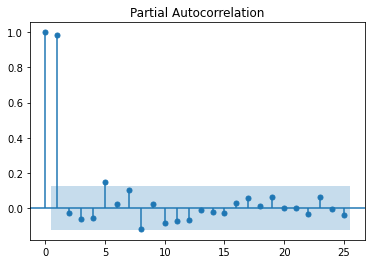

Results of Dickey-Fuller Test:
Test Statistic                -8.242025e+00
p-value                        5.683312e-13
#Lags Used                     5.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.315199e+00
p-value                        3.696873e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 422.797
Method:                       css-mle   S.D. of innovat

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

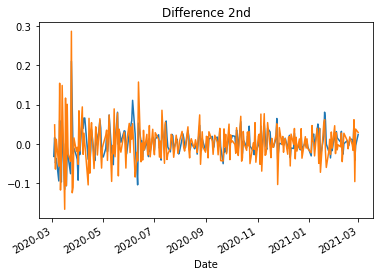

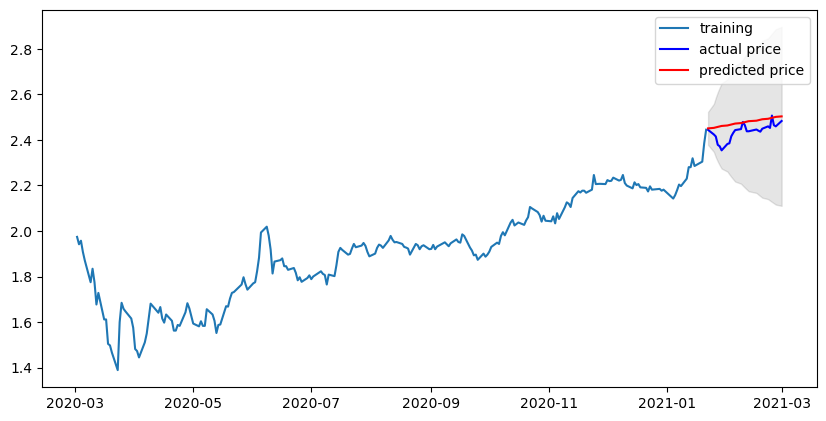

MSE:  0.3258751269122366
MAE:  0.49693725086735885
RMSE:  0.5708547336339049
MAPE: 4.43%


In [68]:
filename = files_name[4]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)

Date
2020-03-02    132.710007
2020-03-03    130.949997
2020-03-04    131.850006
2020-03-05    129.199997
2020-03-06    127.110001
Name: Close, dtype: float64


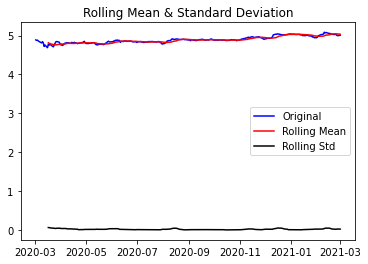

Results of Dickey-Fuller Test:
Test Statistic                  -0.900887
p-value                          0.787680
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.570121
p-value                          0.000147
#Lags Used                      12.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


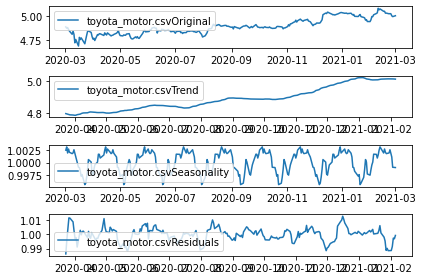

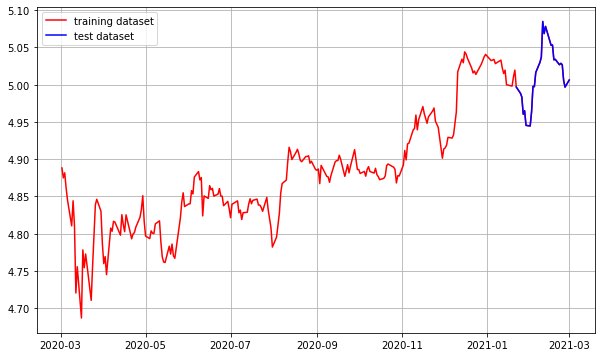

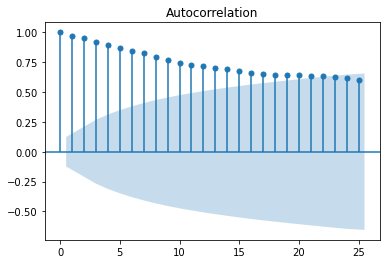

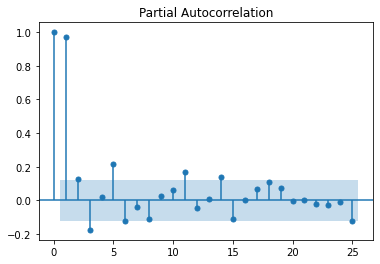

Results of Dickey-Fuller Test:
Test Statistic                -7.910178e+00
p-value                        3.967344e-12
#Lags Used                     9.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.269877e+00
p-value                        4.825427e-13
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 574.593
Method:                       css-mle   S.D. of innovat

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

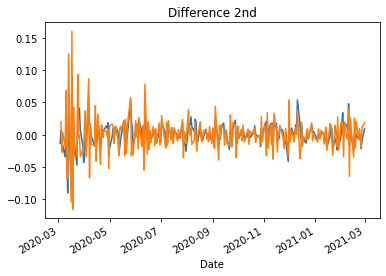

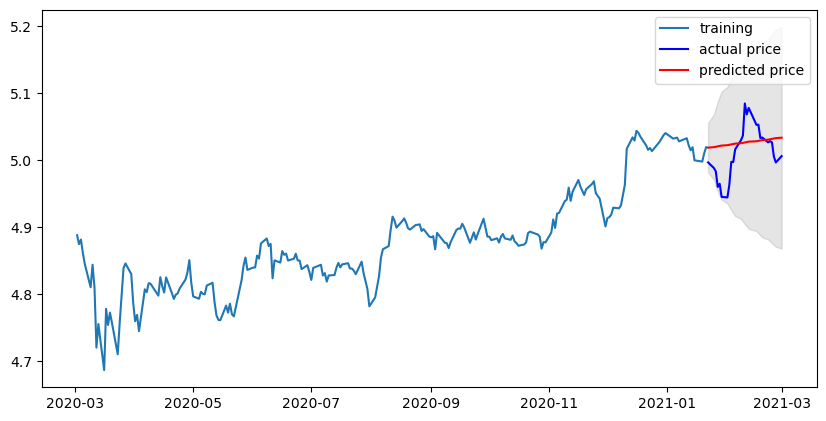

MSE:  33.087448722069524
MAE:  4.663047667285624
RMSE:  5.752169044983773
MAPE: 3.14%


In [69]:
filename = files_name[5]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)

Date
2020-03-02    17.250000
2020-03-03    17.010000
2020-03-04    17.600000
2020-03-05    16.770000
2020-03-06    16.860001
Name: Close, dtype: float64


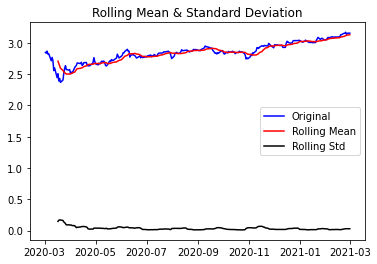

Results of Dickey-Fuller Test:
Test Statistic                  -0.730645
p-value                          0.838651
#Lags Used                       6.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.609696e+00
p-value                        6.423247e-09
#Lags Used                     9.000000e+00
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


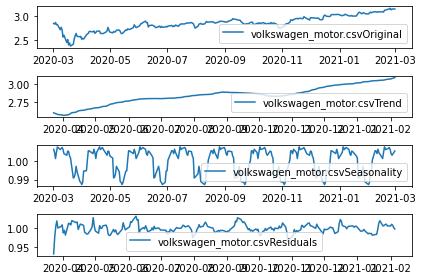

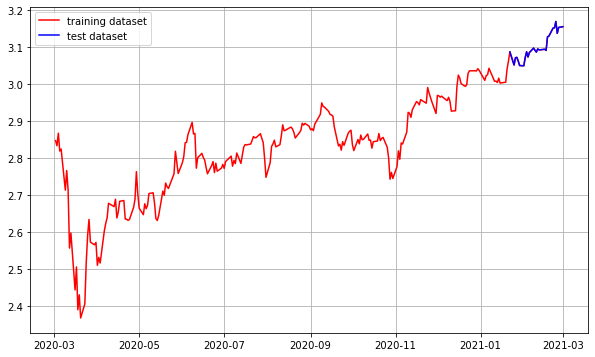

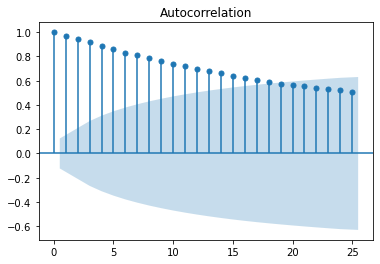

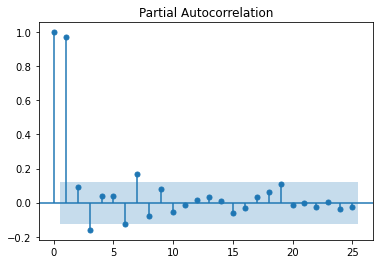

Results of Dickey-Fuller Test:
Test Statistic                -7.224190e+00
p-value                        2.073591e-10
#Lags Used                     5.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.088362e+00
p-value                        1.399858e-12
#Lags Used                     1.200000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 446.526
Method:                       css-mle   S.D. of innovat

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

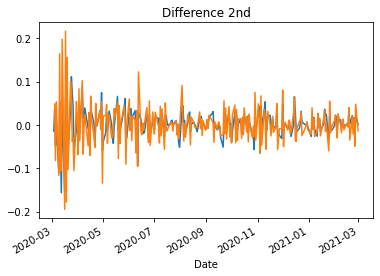

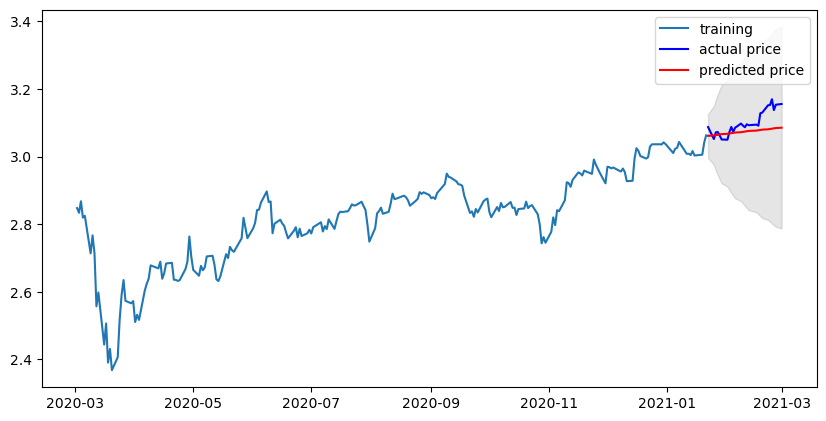

MSE:  0.7727866455736261
MAE:  0.6658380995517944
RMSE:  0.87908284340762
MAPE: 2.92%


In [74]:
filename = files_name[6]
ts_log = read_data(filename)
anal_stat(filename, ts_log)
train_data, test_data = split_data(ts_log)
draw_acf_pacf(ts_log)
differencing(ts_log)
fc, se, conf = model_train_test(train_data, test_data)
result(test_data)